# CSE 4038 - Computer Vision in Health Care Lab

### Name: V Padmaja
### RegNo: 19BAI1107
## Lab Experiment 8: Fourier Transformation
### Dataset Used: Image from IDRiD Dataset

### Mounting the drive

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Importing Necessary Libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFilter

## Original Image

### Reading and Displaying the Image

In [3]:
image = cv2.imread('/content/gdrive/MyDrive/IDRiD_13.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

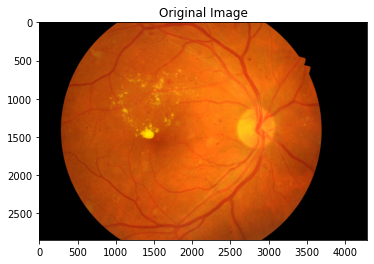

In [4]:
plt.title("Original Image")
plt.imshow(image)

## Converting to Gray scale

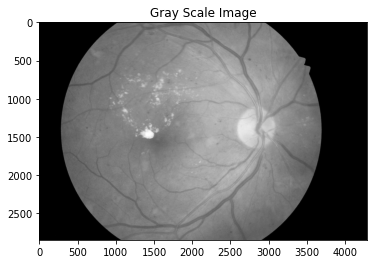

In [5]:
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.title("Gray Scale Image")
plt.imshow(image, cmap = 'gray')

#### This iris in the above image is mildly affected with diabetic retinopathy

## i) Fourier Transform using Numpy

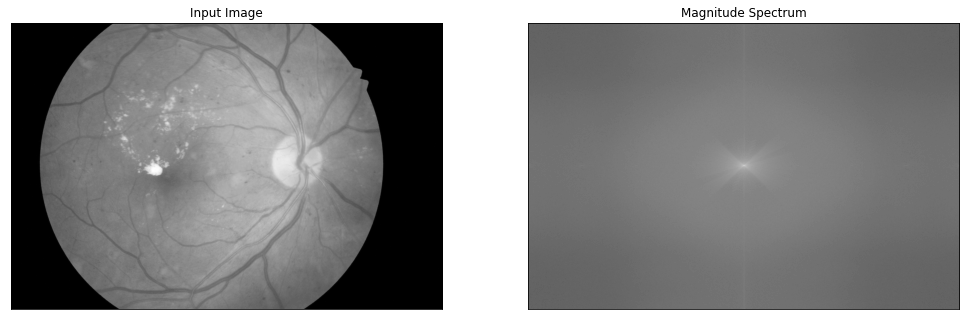

In [6]:
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.figure(figsize=(17,17))
plt.subplot(121), plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([]) 
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([]) 
plt.show()

### Inference: Whiter region is present at the center showing low frequency content is more.

## ii) Inverse Fourier Transform using Numpy

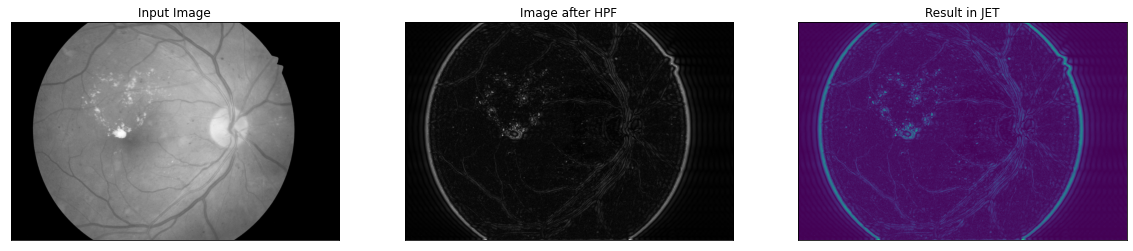

In [7]:
rows, cols = image.shape
crow,ccol = rows//2 , cols//2
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()

### Inference: The result shows High Pass Filtering is an edge detection operation. It shows that most of the image data is present in the low frequency region of the spectrum.

## iii) Fourier Transform using OpenCV

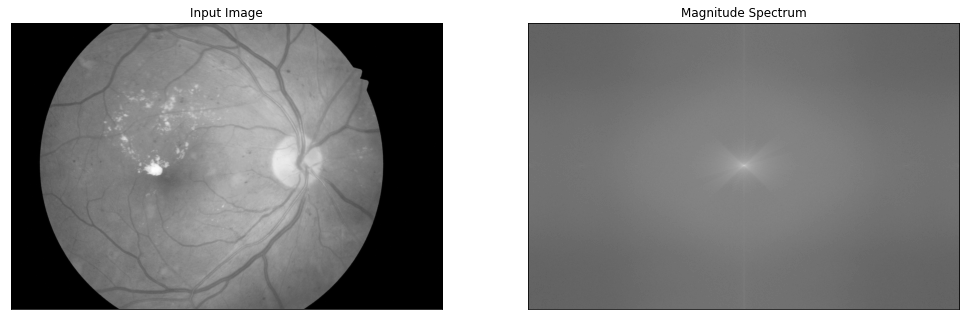

In [8]:
plt.figure(figsize=(17,17))

dft = cv2.dft(np.float32(image),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

### Inference: Whiter region is present at the center showing low frequency content is more. The result is returned as two channels. First channel has the real part of the result and second channel  has the imaginary part of the result.

## iv) Inverse Fourier Transform using OpenCV

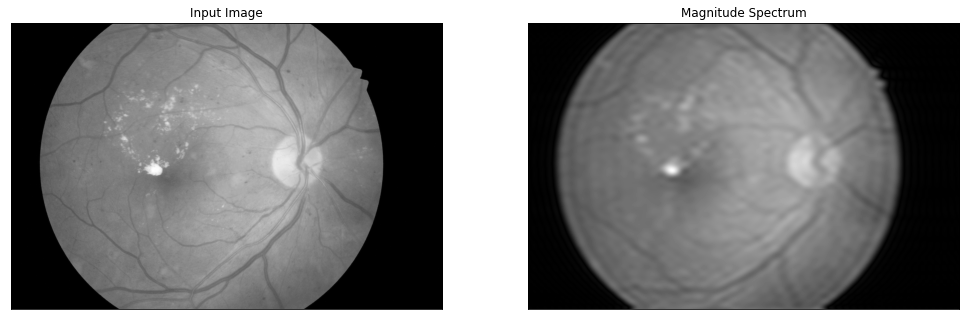

In [9]:
plt.figure(figsize=(17,17))
rows, cols = image.shape
crow,ccol = rows//2 , cols//2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

### Inference: The above Magnitude Spectrum is result of applying LPF to the gray scale image. It removes high frequency contents in the image and blurs the image

## Conclusion
### Fourier Transform and Inverse Fourier Transform has been tested out on the IDRiD Medical Image Dataset. From the above experiment we can say that OpenCV functions cv2.dft() and cv2.idft() are faster than Numpy counterparts. But Numpy functions are more user-friendly.